## Importing Libraries and Data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# Importing Data set
data = pd.read_csv('./netflix_titles.csv')
# Printing first 5 rows
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Checking out data types and missing data

In [3]:
#Checking columns names
list(data.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
data.shape[0] # number of entries

6234

We have some missing values in Director, Country, Cast and Date added. We will deal with it when we visualize it

#  Number of Movies vs Number of Series

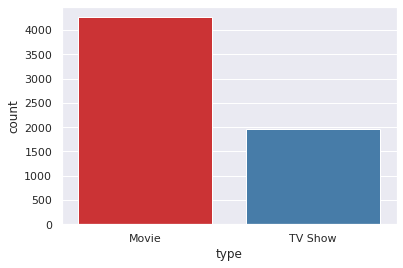

In [6]:
sns.set(style='darkgrid')
sns.countplot(x = 'type',data=data,palette='Set1')

We see that Netflix has way more number of Movies than TV Shows

# Which country creates most number of Shows/Movies in Netflix?

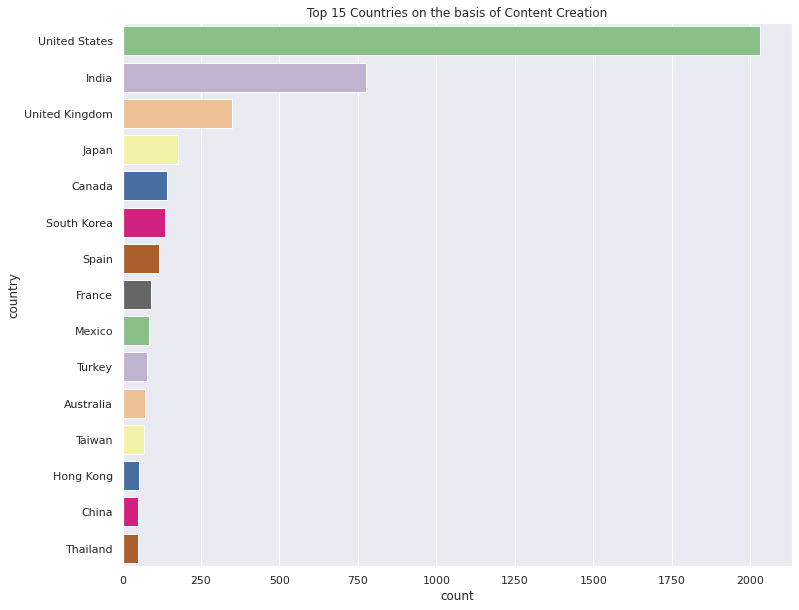

In [7]:
plt.figure(figsize=(12,10))
plt.title('Top 15 Countries on the basis of Content Creation')
sns.countplot(data=data,y='country',order=data['country'].value_counts().index[0:15],palette='Accent')

US Produces most number of shows!

## In which year highest number of Shows were added?

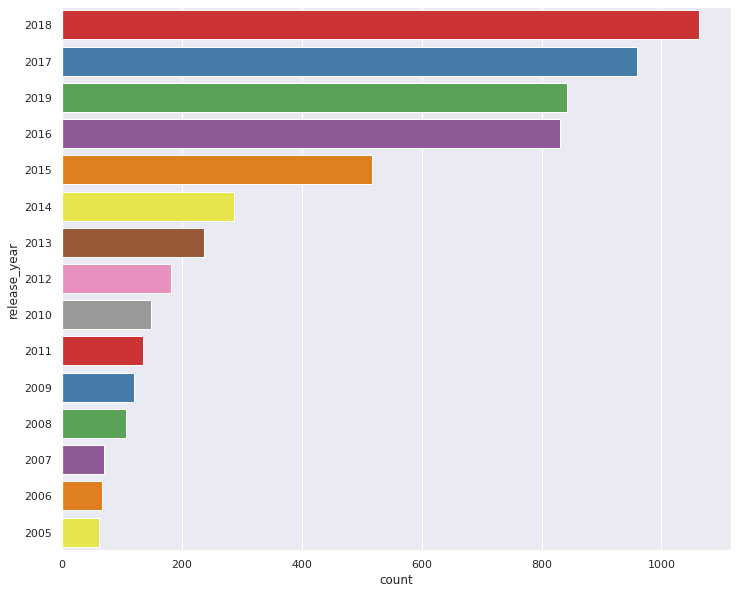

In [8]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year',data=data,order=data['release_year'].value_counts().index[0:15],palette='Set1')

In 2018 Most number of shows and movies were added!

<H1> MOVIES </H1>

In [9]:
movie = data[data['type']=='Movie']
#movie.columns
movie.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


<H2>What is the average duration of Movies in Netflix?</H2>

In [10]:
duration = []
movie = movie[movie['duration'].notna()]
for i in movie['duration']:
    duration.append(int(i.strip('min')))

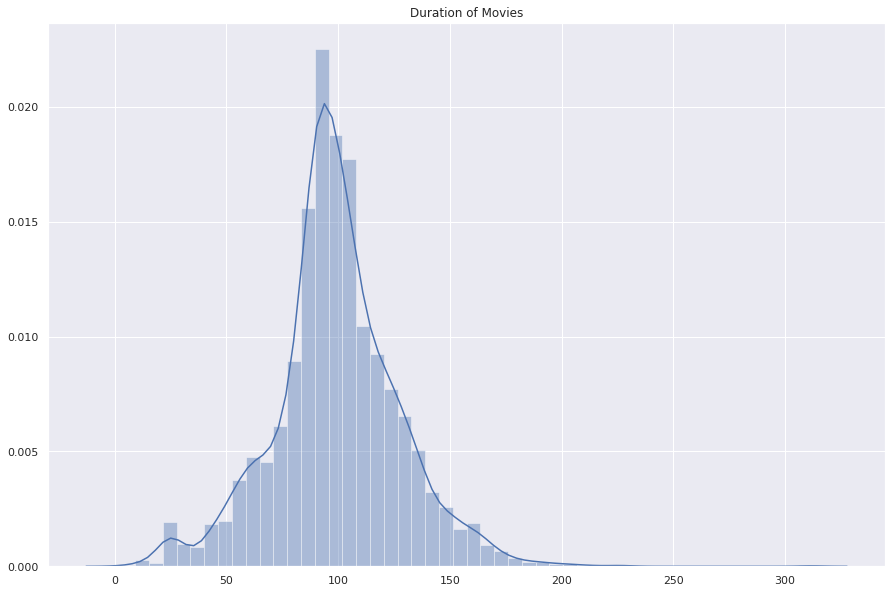

In [11]:
plt.figure(1,figsize=(15,10))
plt.title("Duration of Movies")
sns.distplot(duration)

Most number of Movies run for 90 minutes.

## Director with Most movies

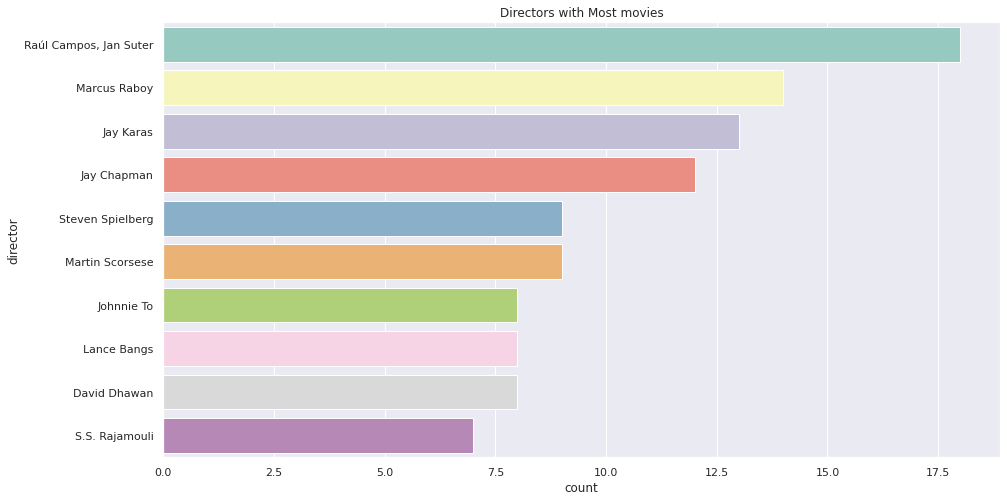

In [12]:
plt.figure(figsize=(15,8))
plt.title('Directors with Most movies')
sns.countplot(y='director',data=movie,order=movie['director'].value_counts().index[0:10],palette='Set3')

Raul Campos has directed Most Number of Movies

## Most movies from a Specific Genre

In [13]:
genrePerMovie=[]
totalGenre = []
setGenre = set()
set1 = set()
for i in movie['listed_in']:
    if(type(i)==str):
        g = i.split(',')
        for genre in g:
            setGenre.add(genre.strip())

In [14]:
totalGenre = list(setGenre)
#len(totalGenre)

In [15]:
%%time
storeCountOfGenre = {}
currentGenre = []
for actualGenre in totalGenre:
    count = 1
    for i in movie['listed_in']:
        currentGenre = []
        if(type(i)==str):
            s=i.split(',')
            for j in s:
                currentGenre.append(j.strip())
            if(actualGenre in currentGenre):
                if actualGenre not in storeCountOfGenre:
                    storeCountOfGenre[actualGenre] = 1
                else:
                    storeCountOfGenre[actualGenre] +=1

CPU times: user 54.2 ms, sys: 0 ns, total: 54.2 ms
Wall time: 53.8 ms


In [16]:
import operator
import itertools

sorted_Genre = dict(sorted(storeCountOfGenre.items(), key=operator.itemgetter(1),reverse=True))
finalSortedListOfGenre = dict(itertools.islice(sorted_Genre.items(),10))

keysGenre = list(finalSortedListOfGenre.keys())
keysGenre = keysGenre[1:]
valuesGenre = list(finalSortedListOfGenre.values())
valuesGenre = valuesGenre[1:]

#[1:] is done because after all this calculations, 'Internal Movies' came up in the top as most movie had this Genre.
#But 'International Movie' is not a genre. So a temporary solution is to remove 1st element from value and key list

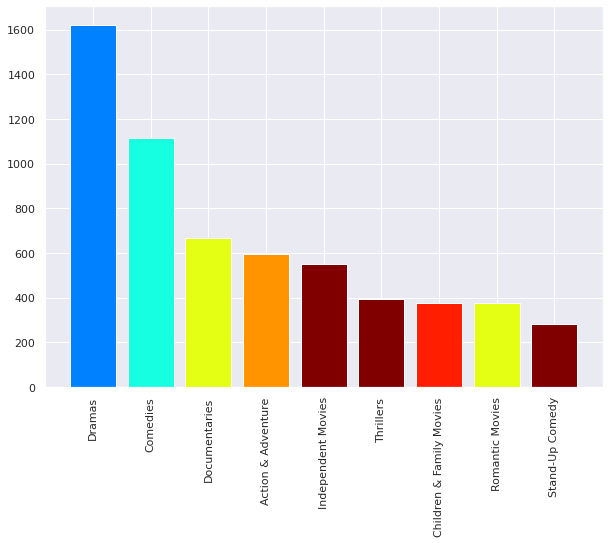

In [41]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
dataColorGenre = [2, 3, 5, 6, 8, 12, 7, 5,9,11,10,4]
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=8)

plt.figure(figsize=(10,7))
plt.bar(keysGenre, valuesGenre, color=my_cmap(my_norm(dataColorGenre)))
plt.xticks(rotation=90)
plt.show()

Dramas tops the list followed by Comedy Movies and then Documentries

## Casts with most number of Movies in Netflix

In [18]:
castPerMovie=[]
totalCast = []
set1 = set()
for i in movie['cast']:
    if(type(i)==str):
        s = i.split(',')
        for j in s:
            set1.add(j.strip())

In [19]:
# Run this to check if any cast has repeated ( CROSS VERIFY IF THE ABOVE CODE WORKS AS EXPECTED)
#from collections import Counter
#Counter(l)

In [20]:
totalCast = list(set1)
#len(totalCast)

In [21]:
%%time
storeCounts = {}
currentCasts = []
for actualCast in totalCast:
    count = 1
    for i in movie['cast']:
        currentCasts = []
        if(type(i)==str):
            s=i.split(',')
            for j in s:
                currentCasts.append(j.strip())
            if(actualCast in currentCasts):
                if actualCast not in storeCounts:
                    storeCounts[actualCast] = 1
                else:
                    storeCounts[actualCast] +=1

CPU times: user 1min 59s, sys: 1.95 ms, total: 1min 59s
Wall time: 1min 59s


In [39]:
sorted_d = dict(sorted(storeCounts.items(), key=operator.itemgetter(1),reverse=True))
finalSortedList = dict(itertools.islice(sorted_d.items(),20))

keys = finalSortedList.keys()
values = finalSortedList.values()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

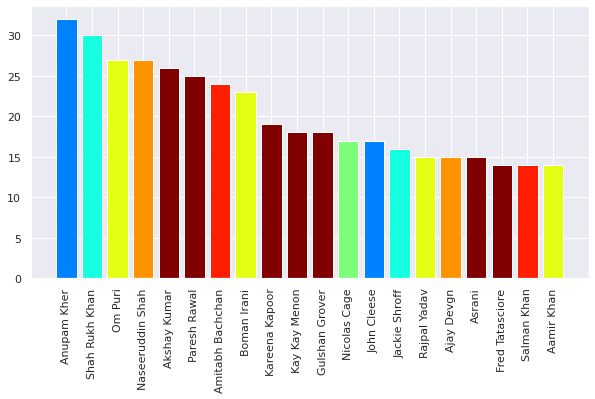

In [42]:
plt.figure(figsize=(10,5))

dataColorDirector = [2, 3, 5, 6, 8, 12, 7, 5,9,11,10,4]
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=8)

plt.bar(keys,values,color=my_cmap(my_norm(dataColorDirector)))
plt.xticks(rotation=90)

Anupam Kher tops the list with most number of movies

## TV Series

In [29]:
data = pd.read_csv('./netflix_titles.csv')
series = data[data['type']=='TV Show']
series.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


## Average No. of Seasons in TV Shows

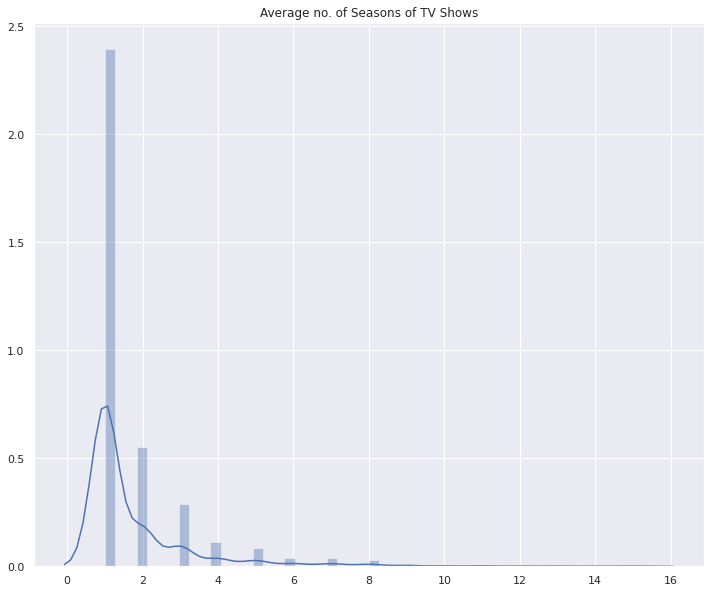

In [38]:
durationSeries = []
tvshow = series[series['duration'].notna()]
for i in tvshow['duration']:
    durationSeries.append(int(i.strip('Season')))

plt.figure(figsize=(12,10))
plt.title('Average no. of Seasons of TV Shows')
sns.distplot(durationSeries)

Most of the TV Shows in Netflix have 1 Season

## Country with most no. of available TV Shows

In [45]:
setCountry = set()
for country in series['country']:
    if(type(country) == str):
        s = country.split(',')
        for singleCountry in s:
            setCountry.add(singleCountry.strip())

In [47]:
#setCountry
totalCountriesForSeries = list(setCountry)
len(totalCountriesForSeries)

59

In [49]:
%%time
currentCountries = []
countCountryTvShows = dict()
for singleCountry in totalCountriesForSeries:
    currentCountries = []
    for country in series['country']:
        if(type(country)==str):
            s = country.split(',')
            for j in s:
                currentCountries.append(j.strip())
            if(singleCountry in currentCountries):
                if(singleCountry not in countCountryTvShows):
                    countCountryTvShows[singleCountry] = 1
                else:
                    countCountryTvShows[singleCountry]+=1

CPU times: user 375 ms, sys: 12 µs, total: 375 ms
Wall time: 373 ms


In [55]:
sorted_countCountriesTvShows = dict(sorted(countCountryTvShows.items(), key=operator.itemgetter(1),reverse=True))
finalSortedDictTvShows = dict(itertools.islice(sorted_countCountriesTvShows.items(),10))

keys = finalSortedDictTvShows.keys()
values = finalSortedDictTvShows.values()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

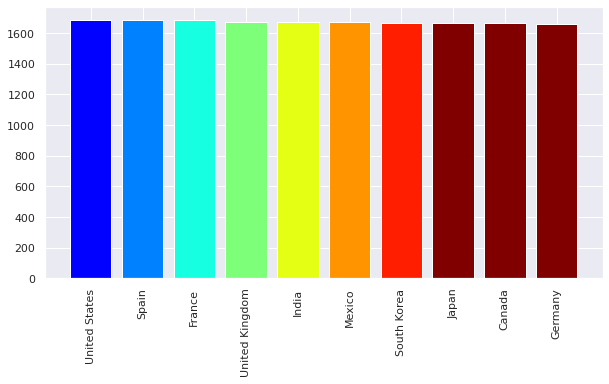

In [60]:
#finalSortedDictTvShows

plt.figure(figsize=(10,5))

dataColorDirector = [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12]
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=8)

plt.bar(keys,values,color=my_cmap(my_norm(dataColorDirector)))
plt.xticks(rotation=90)

All these countries have 1600+ tv shows available in their Country